In [14]:
import pandas as pd
url = "https://raw.githubusercontent.com/Roberto-M-M/carne/main/co-emissions-per-capita.csv"
datos_csv = pd.read_csv(url, encoding='latin1')
datos_csv

,Entity,Code,Year,Annual COâ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.711830
26596,Zimbabwe,ZWE,2019,0.636645
26597,Zimbabwe,ZWE,2020,0.500945
26598,Zimbabwe,ZWE,2021,0.524972


In [15]:
datos_csv.head() #Ver de forma mas ordenada

,Entity,Code,Year,Annual COâ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [16]:
len(datos_csv) #cuantos datos tengo

26600

In [17]:
num_filas_por_columna = len(datos_csv)
print("Número de filas por columna:")
print(num_filas_por_columna) #cuantos datos tengo en cada columna

Número de filas por columna:
26600


In [18]:
datos_csv.dtypes  #podemos ver todas las columnas y el tipo de dato que contiene

Entity                                  object
Code                                    object
Year                                     int64
Annual COâ emissions (per capita)    float64
dtype: object

In [19]:
datos_csv.isna().sum() #datos faltantes

Entity                                    0
Code                                   3554
Year                                      0
Annual COâ emissions (per capita)       0
dtype: int64

Por lo que se ve no tiene datos faltantes el data set

In [20]:
#Primero podemos inspeccionar si hay valores únicos con el siguiente comando:

datos_csv.nunique()

Entity                                   231
Code                                     215
Year                                     228
Annual COâ emissions (per capita)    24409
dtype: int64

Cambiamos el nombre de la columna "Annual COâ emissions (per capita)" para trabajar mas facil

In [21]:
datos_csv.rename(columns={'Annual COâ emissions (per capita)': 'Emisiones de CO2'}, inplace=True)
# Ahora la columna 'Unnamed: 5' se llama 'NuevaColumna'
datos_csv

,Entity,Code,Year,Emisiones de CO2
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.711830
26596,Zimbabwe,ZWE,2019,0.636645
26597,Zimbabwe,ZWE,2020,0.500945
26598,Zimbabwe,ZWE,2021,0.524972


In [22]:
#Procedemos a inspeccionar primero cuáles podrían ser esos datos repetidos.
datos_csv[datos_csv.duplicated(subset = ["Entity", "Year", "Emisiones de CO2"],keep=False)].sort_values("Emisiones de CO2")

,Entity,Code,Year,Emisiones de CO2


In [23]:
pais_buscado = "Chile"  # Por ejemplo, aquí buscamos "United States"

# Filtrar el conjunto de datos para el país buscado
datos_pais_buscado = datos_csv[datos_csv['Entity'] == pais_buscado]

# Mostrar los datos del país buscado
datos_pais_buscado

,Entity,Code,Year,Emisiones de CO2
5098,Chile,CHL,1895,0.178420
5099,Chile,CHL,1896,0.179661
5100,Chile,CHL,1897,0.211175
5101,Chile,CHL,1898,0.241790
5102,Chile,CHL,1899,0.204284
...,...,...,...,...
5221,Chile,CHL,2018,4.515097
5222,Chile,CHL,2019,4.830861
5223,Chile,CHL,2020,4.154240
5224,Chile,CHL,2021,4.567579


In [24]:
#Primero debemos cambiar el tipo de dato a un tipo categórico para que la función logre entender la transformación
datos_csv['Entity'] = datos_csv['Entity'].astype('category')
datos_csv.dtypes

Entity              category
Code                  object
Year                   int64
Emisiones de CO2     float64
dtype: object

In [25]:
df = datos_csv
print(df.shape)
df.head()

(26600, 4)


,Entity,Code,Year,Emisiones de CO2
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [26]:
# Leer el archivo CSV
df = datos_csv

# Filtrar las filas donde la columna 'Entity' es 'Chile'
df_chile = df[df['Entity'] == 'Chile']

# Guardar el resultado en un nuevo archivo CSV
df_chile.to_csv('chile_datos.csv', index=False)

print("Se ha creado el archivo 'chile_datos.csv' con los datos filtrados.")

Se ha creado el archivo 'chile_datos.csv' con los datos filtrados.


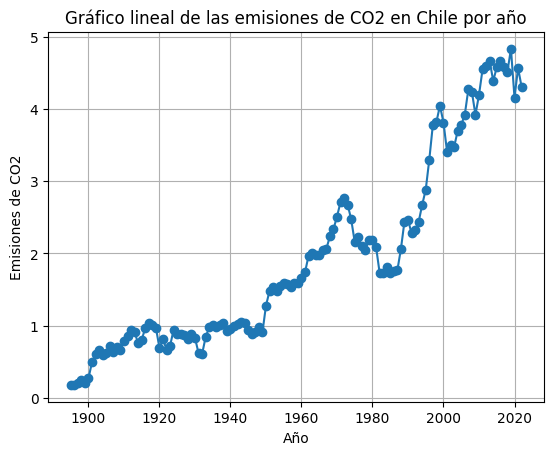

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Filtrar el DataFrame para obtener solo los datos de Chile

chile_df = df[df['Entity'] == 'Chile']
# Crear la gráfica lineal

plt.plot(chile_df['Year'], chile_df['Emisiones de CO2'], marker='o')  # 'o' es para marcar cada punto
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.title('Gráfico lineal de las emisiones de CO2 en Chile por año')
plt.grid(True)  # Añadir una cuadrícula para una mejor visualización
plt.show()
